Daniele Sasso and a few others made their dataset availible on Zenodo - [https://doi.org/10.5281/zenodo.14927602](https://doi.org/10.5281/zenodo.14927602) - daily webscraping data from different shops of an Italian supermarket chain.

Manually manually downloaded the dataset to `/data/bronze/` for a quick exploration

In [1]:
# Required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## General EDA

In [2]:
# Load dataset
df = pd.read_csv("../data/bronze/Variations_Food_Prices_Italian_Supermarkets_raw.csv")

In [3]:
df.head()

,date,price,product_id,store_id,region,product,COICOP5,COICOP4
0,2020-12-03,1.99,2,2,calabria,arance navelina italia calibro 1.5 kg,Oranges,Fruit
1,2020-12-03,2.48,2,3,lazio,arance navelina italia calibro 1.5 kg,Oranges,Fruit
2,2020-12-03,2.49,2,4,calabria,arance navelina italia calibro 1.5 kg,Oranges,Fruit
3,2020-12-03,1.99,2,5,calabria,arance navelina italia calibro 1.5 kg,Oranges,Fruit
4,2020-12-03,2.49,2,8,lazio,arance navelina italia calibro 1.5 kg,Oranges,Fruit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4033211 entries, 0 to 4033210
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   date        object 
 1   price       float64
 2   product_id  int64  
 3   store_id    int64  
 4   region      object 
 5   product     object 
 6   COICOP5     object 
 7   COICOP4     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 246.2+ MB


## Geographic distribution of unique products by region

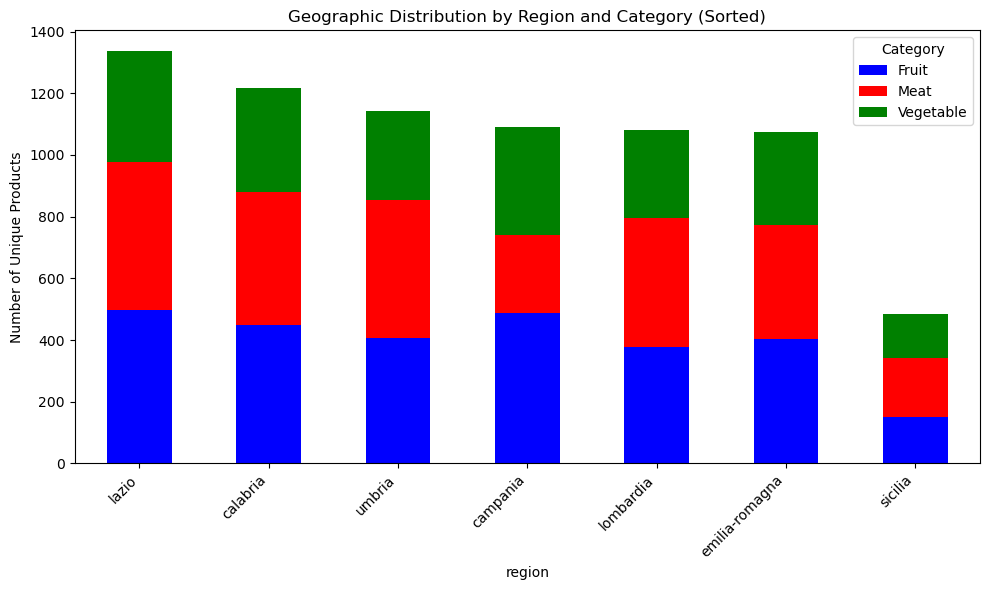

In [5]:
# Convert date column
df['date'] = pd.to_datetime(df['date'])  # Format: YYYY-MM-DD

# Define category colors
category_colors = {"Fruit": "blue", "Vegetable": "green", "Meat": "red"}

geo = df.groupby(["region", "COICOP4"])["product_id"].nunique().reset_index()
pivot_geo = geo.pivot(index="region", columns="COICOP4", values="product_id").fillna(0)
pivot_geo["Total"] = pivot_geo.sum(axis=1)
pivot_geo = pivot_geo.sort_values("Total", ascending=False).drop(columns="Total")
pivot_geo = pivot_geo[["Fruit", "Meat", "Vegetable"]]

pivot_geo.plot(kind="bar", stacked=True, figsize=(10,6), color=["blue", "red", "green"])
plt.ylabel("Number of Unique Products")
plt.title("Geographic Distribution by Region and Category (Sorted)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

## Basic analysis: average price trend over time (by COICOP4)

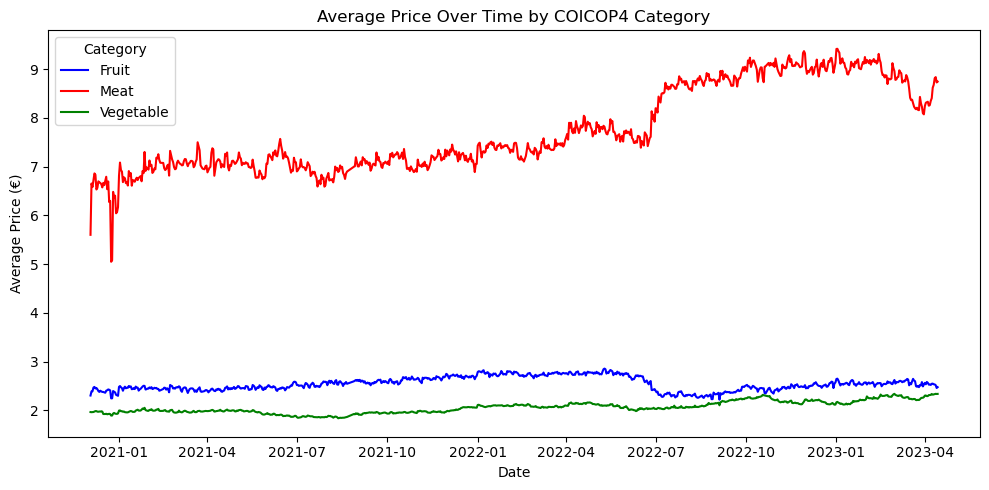

In [6]:
price_trend = df.groupby(["date", "COICOP4"])["price"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=price_trend, x="date", y="price", hue="COICOP4", palette=category_colors)
plt.title("Average Price Over Time by COICOP4 Category")
plt.xlabel("Date")
plt.ylabel("Average Price (€)")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

# Other informative information about the dataset

First, check out the number of unique products

In [ ]:
stats = {}
stats['Number of unique products'] = len(df['product'].value_counts())
stats['Number of unique stores'] = len(df['store_id'].value_counts())
stats['Number of unique regions'] = len(df['region'].value_counts())
stats['Number of COICOP5 categories'] = len(df['COICOP5'].value_counts())
stats['Number of unique scrapes'] = len(df['date'].value_counts())
stats

{'Number of unique products': 2361,
 'Number of unique stores': 20,
 'Number of unique scrapes': 841,
 'Number of unique regions': 7,
 'Number of COICOP5 categories': 24}

Example summary of scrape statistics - number of unique products scraped by store per region

In [38]:
df.pivot_table(index='date', columns=['region','store_id'], aggfunc='count').head(10)

COICOP4                                              \
region     calabria                      campania                 
store_id         2      4      5      11       12     18     20   
date                                                              
2020-12-03    244.0  170.0  152.0  123.0    210.0  108.0  309.0   
2020-12-04    247.0  174.0  148.0  123.0    207.0  108.0  308.0   
2020-12-05    243.0  180.0  147.0  122.0    207.0  108.0  299.0   
2020-12-06    243.0  180.0  147.0  122.0    208.0  108.0  304.0   
2020-12-07    242.0  171.0  148.0  127.0    208.0  105.0  304.0   
2020-12-08    248.0  178.0  148.0  127.0    213.0  105.0  306.0   
2020-12-09    251.0  182.0  147.0  125.0    211.0  105.0  310.0   
2020-12-10    252.0  181.0  149.0  127.0    215.0  106.0  315.0   
2020-12-11    253.0  181.0  151.0  126.0    215.0  106.0  313.0   
2020-12-12    253.0  182.0  152.0  125.0    220.0  106.0  309.0   

                                         ... product_id                \
region     emilia-romagna         lazio  ...      lazio                 
store_id               7      15     3   ...         8      19     21   
date                                     ...                            
2020-12-03          275.0  378.0  207.0  ...      237.0  128.0  184.0   
2020-12-04          348.0  488.0  207.0  ...      235.0  130.0  181.0   
2020-12-05          340.0  495.0  207.0  ...      233.0  130.0  179.0   
2020-12-06          347.0  502.0  207.0  ...      233.0  130.0  179.0   
2020-12-07          344.0  512.0  207.0  ...      232.0  133.0  177.0   
2020-12-08          341.0  503.0  207.0  ...      232.0  135.0  178.0   
2020-12-09          339.0  510.0  207.0  ...      236.0  135.0  182.0   
2020-12-10          335.0  501.0  207.0  ...      235.0  134.0  184.0   
2020-12-11          330.0  502.0  207.0  ...      238.0  135.0  182.0   
2020-12-12          327.0  502.0  207.0  ...      238.0  136.0  180.0   

                                                                 
region     lombardia                             sicilia umbria  
store_id          6      9      10     14     16      13     17  
date                                                             
2020-12-03     366.0  251.0  238.0   74.0  305.0   196.0  255.0  
2020-12-04     450.0  315.0  331.0  112.0  372.0   195.0  253.0  
2020-12-05     448.0  309.0  323.0  113.0  370.0   196.0  251.0  
2020-12-06     464.0  320.0  330.0  130.0  374.0   196.0  251.0  
2020-12-07     470.0  331.0  339.0  121.0  381.0   185.0  253.0  
2020-12-08     478.0  333.0  336.0  126.0  393.0   191.0  257.0  
2020-12-09     444.0  307.0  306.0  110.0  369.0   187.0  257.0  
2020-12-10     450.0  310.0  315.0  109.0  370.0   187.0  257.0  
2020-12-11     480.0  336.0  327.0  117.0  350.0   185.0  257.0  
2020-12-12     477.0  332.0  325.0  116.0  349.0   190.0  259.0  

[10 rows x 100 columns]

Average number of products scraped per store per day

In [9]:
df.groupby(["date", "store_id"])["product_id"].count().reset_index()['product_id'].mean()

239.81513854203828

Get some info on how many scrapes there were and how many products were captured on average per scrape

In [14]:
df.groupby(["date"])['product_id'].count()

date
2020-12-03    4410
2020-12-04    4932
2020-12-05    4900
2020-12-06    4975
2020-12-07    4990
              ... 
2023-04-10    3219
2023-04-11    3172
2023-04-12    3029
2023-04-13    2984
2023-04-14    3095
Name: product_id, Length: 841, dtype: int64

Evaluate average monthly of web offers captured per month

In [40]:
df2 = df.copy(deep=True)
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.set_index('date')
# df2.head()
df_scrapes = df2.resample('ME')['product_id'].count().to_frame()
df_scrapes.head()
# df.info()

,product_id
date,
2020-12-31,141664
2021-01-31,155193
2021-02-28,144178
2021-03-31,163449
2021-04-30,166847


In [6]:
df_scrapes['product_id'].mean()

139076.24137931035

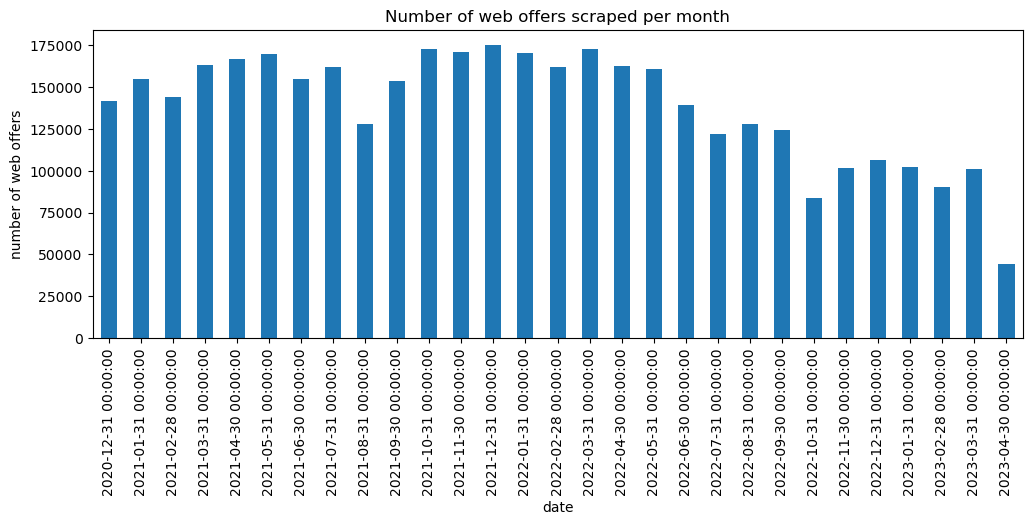

In [42]:
df_scrapes.plot(
    kind='bar',
    figsize=(12,4),
    title="Number of web offers scraped per month",
    legend=False)
plt.ylabel("number of web offers")
plt.show()
